In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [70]:


def sim_returns(p, t, win_amount, loss_amount, allocation, portfolio = 1000):
    
    starting_portfolio = portfolio

    sim = pd.DataFrame({'trials': np.random.binomial(1,p,t)*win_amount})
    sim.trials = sim.trials - (sim.trials == 0)*loss_amount

    sim['portfolio_amount'] = np.nan

    cumport = allocation*portfolio
    for idx, row in sim.iterrows():
        if row.trials > 0:
            cumport = (1 + win_amount)*cumport
            sim.loc[idx, 'portfolio_amount'] = portfolio*(1 - allocation) + cumport
        else:
            cumport = (1 - loss_amount)*cumport
            portfolio = (1 - allocation)*portfolio + cumport
            sim.loc[idx, 'portfolio_amount'] = portfolio
            cumport = allocation*portfolio

    ending_amount = sim.loc[t - 1, 'portfolio_amount']
    pf_return = ending_amount/starting_portfolio - 1
    return ending_amount, pf_return

-0.198717147363


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001614FA97CC0>]], dtype=object)

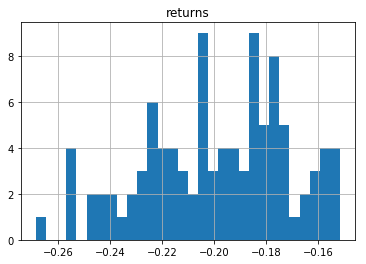

In [97]:
ending_amounts = []
returns = []

n = 100

p = 0.9
t = 500
win_amount = 0.01
loss_amount = 0.5
allocation = 0.01


for i in range(n):
    end_amount, end_return = sim_returns(p, t, win_amount, loss_amount, allocation, portfolio = 1000)
    ending_amounts.append(end_amount)
    returns.append(end_return)

print(np.mean(returns))
pd.DataFrame({'returns': returns}).hist(bins = 30)